In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, load_model, Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [5]:
from keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train.shape

(60000, 28, 28)

In [7]:
Y_test[0]

7

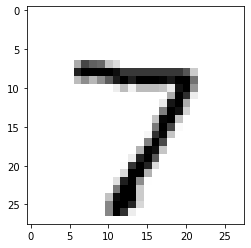

In [8]:
plt.imshow(X_test[0], cmap='binary')

In [9]:
X_train = X_train.reshape(60000, 28, 28, 1) # 채널하나짜리로 만든다

In [10]:
X_test = X_test.reshape(10000, 28, 28, 1)

In [11]:
Y_train = to_categorical(Y_train) # 정답데이터 // 우리가 알 수 있는 분포도로 바꿔줘야한다
Y_test = to_categorical(Y_test)

X_train = X_train / 255.0
X_test = X_test / 255.0

In [13]:
# Create a model
model = Sequential()
model.add(Conv2D(filters=16,
                kernel_size=(5, 5),
                padding="same",
                strides=1,
                activation="relu",
                input_shape=(28, 28, 1))) # 1* 5 * 5 * 16 + 16

In [12]:
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
Total params: 416
Trainable params: 416
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Maxpooling2D()
model.add(MaxPooling2D(pool_size=(2, 2))) # 풀링작업을 통해 절반씩 줄인다

# 특징들만 차원축소하는 과정이라 파람 변화는 없다

In [15]:
model.add(Conv2D(filters=36,
                kernel_size=(3, 3),
                padding="same",
                strides=1,
                activation="relu"))

# 채널의 개수= 1개 / 필터 사이즈 3by3
# 1 * 16 * 3 * 3 * 36 + 36 = 5220

In [16]:
# Flatten()
model.add(Flatten())
# 14*14*36 = 7056 // flatten은 기존에 있던 차원을 납작쿵 나열시키는 것이기 때문에 위의 차원을 다 곱해주는 것

In [17]:
# Dense()
model.add(Dense(128, activation="relu"))
# 7056 * 128 + 128

In [18]:
# Softmax
model.add(Dense(10, activation="softmax")) # 128개 입력값을 가져다가 
# 128 * 10 + 10

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 36)        5220      
_________________________________________________________________
flatten_1 (Flatten)          (None, 7056)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               903296    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 910,222
Trainable params: 910,222
Non-trainable params: 0
________________________________________________

In [20]:
model.compile(
        loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
model.fit(X_train, Y_train,
         batch_size=200, epochs=1,
         validation_split=0.2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/1
48000/48000 [==============================] - 18s 369us/step - loss: 0.2647 - accuracy: 0.9207 - val_loss: 0.0913 - val_accuracy: 0.9737


In [23]:
result = model.evaluate(X_test, Y_test)
print(result)

10000/10000 [==============================] - 1s 112us/step
[0.08003088779505342, 0.9750999808311462]


In [26]:
layer1 = model.get_layer('conv2d_2')
layer1.get_weights()

[array([[[[-5.78871220e-02, -4.34510298e-02, -9.29915085e-02,
           -4.41260710e-02, -5.69079593e-02, -8.06322619e-02,
            1.65044144e-02,  1.18035883e-01,  1.07413597e-01,
           -2.35782303e-02,  1.12892248e-01,  5.30709401e-02,
            2.79035084e-02,  8.49033073e-02, -5.22988848e-03,
           -1.02964401e-01]],
 
         [[-3.38438377e-02, -1.78415272e-02, -7.01274872e-02,
            5.68463728e-02,  1.42987803e-01, -1.50643378e-01,
           -4.29050997e-02, -5.89653999e-02,  1.47035360e-01,
            6.85565025e-02, -8.90670121e-02, -1.81073323e-02,
           -5.05541041e-02,  1.19745672e-01, -4.91653522e-03,
            7.26273190e-03]],
 
         [[-9.21001062e-02,  3.23715247e-02, -5.63837821e-03,
            1.27928644e-01,  5.14968820e-02, -1.15487896e-01,
           -1.16935328e-01,  2.96018422e-02,  1.32395312e-01,
           -1.04937352e-01,  9.69783142e-02, -1.51086539e-01,
           -5.46369031e-02,  8.15574138e-04,  1.22115038e-01,
      

In [27]:
print(layer1.get_weights()[0].shape) # 첫번째 필터 통해 16개 이미지가 만들어졌다

(5, 5, 1, 16)


In [35]:
def plot_weight(w):
    w_min = np.min(w)
    w_max = np.max(w)
    num_grid = math.ceil(math.sqrt(w.shape[3]))
    fix, aixs = plt.subplots(num_grid, num_grid)
    for i, ax in enumerate(aixs.flat):
        if i < w.shape[3]:
            img = w[:,:,0,i]
            ax.imshow(img, vmin=w_min, vmax=w_max)
            
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

In [36]:
def plot_output(w):
    num_grid = math.ceil(math.sqrt(w.shape[3]))
    fix, aixs = plt.subplots(num_grid, num_grid)
    
    for i, ax in enumerate(aixs.flat):
        if i < w.shape[3]:
            img = w[0,:,:,i]
            ax.imshow(img, cmap='binary')
            
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

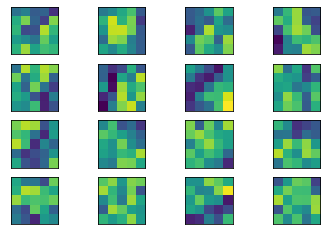

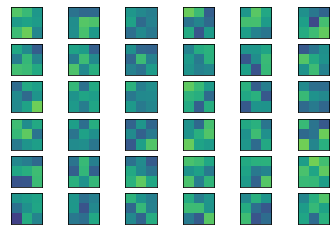

(3, 3, 16, 36)

In [37]:
l1 = model.get_layer('conv2d_2')
w1 = l1.get_weights()[0]
plot_weight(w1)

l2 = model.get_layer('conv2d_3')
w2 = l2.get_weights()[0]
plot_weight(w2)
l2.get_weights()[0].shape

In [39]:
# temp_model = Model(inputs=model.get_layer('conv2d_2').input, outputs=model.get_layer('conv2d_2').output)
temp_model = Model(inputs=model.get_layer('conv2d_2').input, outputs=model.get_layer('conv2d_3').output)
output = temp_model.predict(X_test)

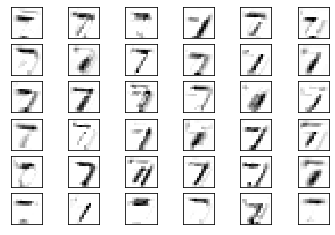

In [40]:
plot_output(output)